<div style="text-align: center;">
  <img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/20230109135607/Types-of-Insurances-1.png" alt="Types of Insurances">
</div>


<a class="anchor" id="Introduction"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Introduction</p> 

<div style="background-color:blue; padding:20px; font-size:15px">

# Introduction
##### Health insurance is a crucial component of personal and public well-being, providing financial protection against the high costs of medical care. It involves a contract between an individual and an insurance company, where the individual pays a premium, and in return, the insurer covers specific medical expenses. This coverage can include doctor visits, hospital stays, prescription medications, preventive care, and other medical services.

##### Health insurance plans vary widely, offering different levels of coverage, deductibles, and co-payments. Some plans are comprehensive, covering a broad range of services, while others are more limited, focusing on specific areas such as catastrophic events or major illnesses. Many countries have a mix of private and public health insurance options, with public systems often providing a basic level of care and private plans offering more extensive services.

##### Having health insurance is important because it not only helps individuals access necessary medical care but also protects them from potentially overwhelming medical bills. Without insurance, the cost of medical treatment can be prohibitively expensive, leading to significant financial strain. Moreover, insured individuals are more likely to seek preventive care and early treatment, which can improve overall health outcomes and reduce the long-term costs of healthcare.

##### In addition to individual benefits, health insurance also plays a key role in public health by helping to maintain a healthy population, reducing the burden on healthcare systems, and supporting economic stability.
##### In this notebook, we will conduct a detailed analysis of a health insurance company's data to forecast future insurance claim amounts and identify the factors that contribute to higher healthcare costs. The dataset comprises information from 1,338 policyholders, each described by seven attributes related to their health and demographic profiles, such as age, gender, BMI, and smoking status.My primary objective is to predict the total claim amount, or "charges," billed to the insurance company. To enhance the accuracy of our predictions, we will develop separate models for each of the four regions where the company's policyholders are located: Southwest, Southeast, Northwest, and Northeast. This approach aims to provide more precise cost predictions tailored to regional differences in healthcare costs.

| **Attribute** | **Description** |
|---------------|------------------|
| **Age**       | The age of the primary beneficiary. Age can significantly impact insurance costs and health risks. |
| **Sex**       | The gender of the insurance contractor, categorized as female or male. Gender may influence health outcomes and insurance pricing. |
| **BMI (Body Mass Index)** | An objective measure of body weight relative to height, calculated as weight in kilograms divided by the square of height in meters. A BMI in the range of 18.5 to 24.9 is considered normal, with deviations potentially indicating health issues. |
| **Children**  | The number of children or dependents covered by the health insurance policy. This can affect the overall insurance cost due to additional coverage requirements. |
| **Smoker**    | Indicates whether the individual is a smoker or a non-smoker. Smoking status is a crucial factor influencing health risks and insurance premiums. |
| **Region**    | The beneficiary's residential area in the US, with categories including northeast, southeast, southwest, and northwest. Regional factors can influence healthcare costs and insurance rates. |
| **Charges**   | The individual medical costs billed by health insurance. This is the primary outcome variable we will analyze to understand the impact of the other factors. |


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Libraries</p> 

In [1]:
!pip install pycaret -q


In [2]:
!pip install mlflow


   ---------------------------------------- 0.0/24.7 MB ? eta -:--:--
   - -------------------------------------- 1.0/24.7 MB 7.2 MB/s eta 0:00:04
   ---- ----------------------------------- 2.9/24.7 MB 7.6 MB/s eta 0:00:03
   ------- -------------------------------- 4.5/24.7 MB 7.5 MB/s eta 0:00:03
   --------- ------------------------------ 6.0/24.7 MB 7.5 MB/s eta 0:00:03
   ------------ --------------------------- 7.6/24.7 MB 7.5 MB/s eta 0:00:03
   -------------- ------------------------- 9.2/24.7 MB 7.4 MB/s eta 0:00:03
   ----------------- ---------------------- 10.7/24.7 MB 7.5 MB/s eta 0:00:02
   ------------------- -------------------- 12.3/24.7 MB 7.4 MB/s eta 0:00:02
   ---------------------- ----------------- 13.9/24.7 MB 7.4 MB/s eta 0:00:02
   ------------------------- -------------- 15.5/24.7 MB 7.4 MB/s eta 0:00:02
   --------------------------- ------------ 17.0/24.7 MB 7.4 MB/s eta 0:00:02
   ------------------------------ --------- 18.6/24.7 MB 7.4 MB/s eta 0:00:01


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import plotly as plot
import warnings
warnings.filterwarnings('ignore')
sns.set_style()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv(r"C:\Users\dell\Downloads\Insurance\Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


In [5]:
# Dictionary for replacing categorical values with numerical values
clean_data = {
    'sex': {'male': 0, 'female': 1},
    'smoker': {'no': 0, 'yes': 1},
    'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
}

# Copy the original DataFrame to avoid modifying it directly
df_copy = df.copy()

# Replace categorical values with numerical values based on the dictionary
df_copy.replace(clean_data, inplace=True)

# Display the updated DataFrame
print(df_copy)


      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       3  16884.92400
1      18    0  33.770         1       0       2   1725.55230
2      28    0  33.000         3       0       2   4449.46200
3      33    0  22.705         0       0       0  21984.47061
4      32    0  28.880         0       0       0   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       0  10600.54830
1334   18    1  31.920         0       0       1   2205.98080
1335   18    1  36.850         0       0       2   1629.83350
1336   21    1  25.800         0       0       3   2007.94500
1337   61    1  29.070         0       1       0  29141.36030

[1338 rows x 7 columns]


<a class="anchor" id="About_Data"></a>
# <p style="padding:10px;background-color:#2e5551;margin:0;color:#c27849;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data analysis</p> 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


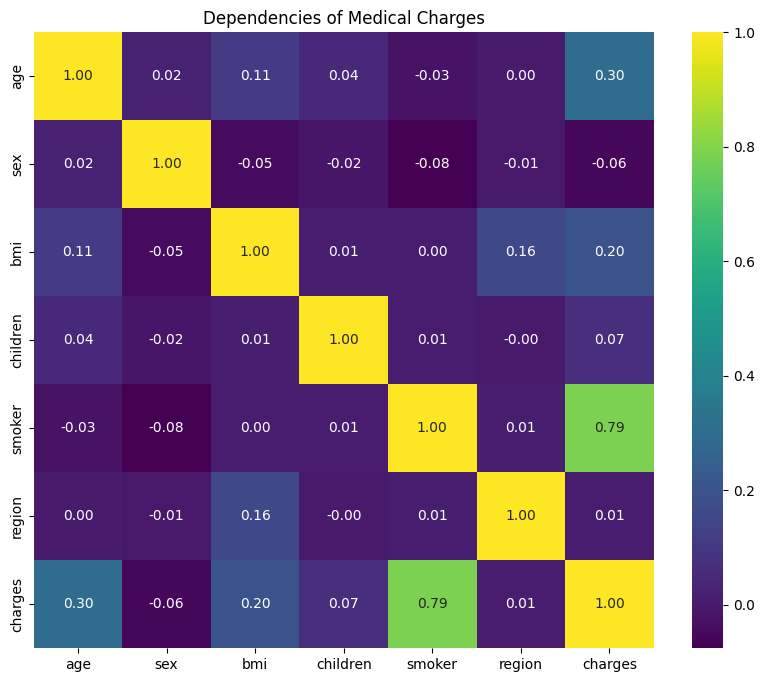

In [8]:
corr = df_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='viridis',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.show()

In [9]:
df.select_dtypes(include=['object']).describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
cat=df.select_dtypes(include=['object']).columns.tolist()
for i in cat:
    obs=df[i].value_counts()
    avg_claim=df.groupby(i)["charges"].mean()
    display(pd.DataFrame({"Number of Policyholders":obs, "Average Claim Amount":avg_claim.map('${:,.2f}'.format)})\
            .sort_values('Number of Policyholders', ascending=False)\
            .style.set_caption("Variable: {}".format(i)))

,Number of Policyholders,Average Claim Amount
sex,,
male,676,"$13,956.75"
female,662,"$12,569.58"


,Number of Policyholders,Average Claim Amount
smoker,,
no,1064,"$8,434.27"
yes,274,"$32,050.23"


,Number of Policyholders,Average Claim Amount
region,,
southeast,364,"$14,735.41"
northwest,325,"$12,417.58"
southwest,325,"$12,346.94"
northeast,324,"$13,406.38"


<div style="background-color:Blue; padding:20px; font-size:15px">
    
    
👉**Sex:**
   - **Number of Policyholders:** There are 676 male policyholders and 662 female policyholders.
   - **Average Claim Amount:** On average, male policyholders have a claim amount of \\$13,956.75, whereas female policyholders have a lower average claim amount of \\$12,569.58. 

👉**Smoker:**
   - **Number of Policyholders:** There are 1,064 non-smokers and 274 smokers.
   - **Average Claim Amount:** Smokers have a significantly higher average claim amount of \\$32,050.23 compared to non-smokers, who have an average claim amount of \\$8,434.27. 

👉**Region:**
   - **Number of Policyholders:** The number of policyholders is fairly evenly distributed across regions with 364 in the Southeast, 325 in the Northwest, 325 in the Southwest, and 324 in the Northeast.
   - **Average Claim Amount:** The average claim amount varies by region, with the Southeast having the highest average at \\$14,735.41 and the Southwest the lowest at $12,346.94. The Northeast and Northwest have average claim amounts of \\$13,406.38 and \\$12,417.58, respectively. 


<div style="background-color:blue; padding:20px; font-size:15px">
    
    
### Which region got insured more?

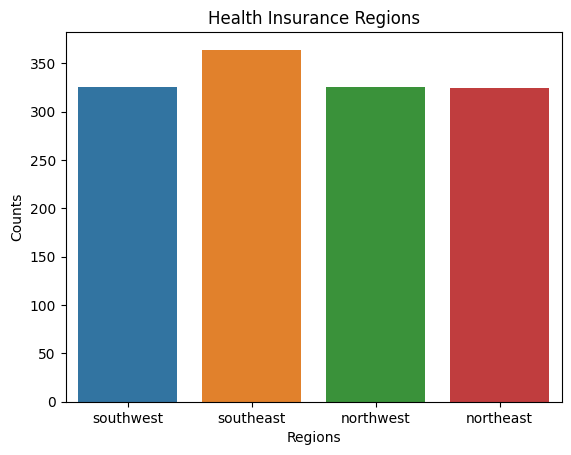

In [11]:
# Let's count the regions
southwest = len(df[df['region'] == 'southwest'])
southeast = len(df[df['region'] == 'southeast'])
northwest = len(df[df['region'] == 'northwest'])
northeast = len(df[df['region'] == 'northeast'])

# Create a bar chart
sns.barplot(x=['southwest', 'southeast', 'northwest', 'northeast'], y=[southwest, southeast, northwest, northeast])

#To add labels and title
plt.xlabel("Regions")
plt.ylabel("Counts")
plt.title("Health Insurance Regions")
plt.show()

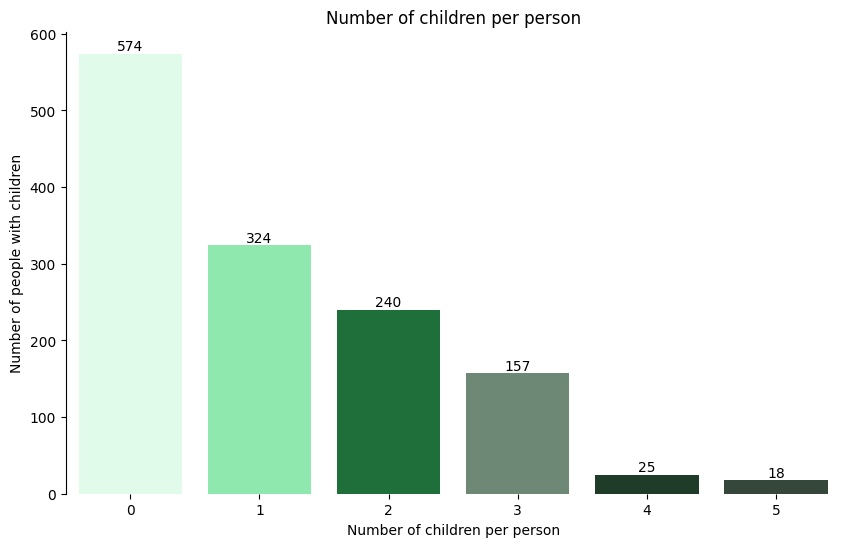

In [12]:
color_scheme = ['#dbffe7','#80f7a8','#107d34', '#688e74','#194126','#314a39']
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(x = df['children'], palette =color_scheme)
plt.title('Number of children per person')
plt.xlabel('Number of children per person')
plt.ylabel('Number of people with children')

for i in ax.containers:
    ax.bar_label(i)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

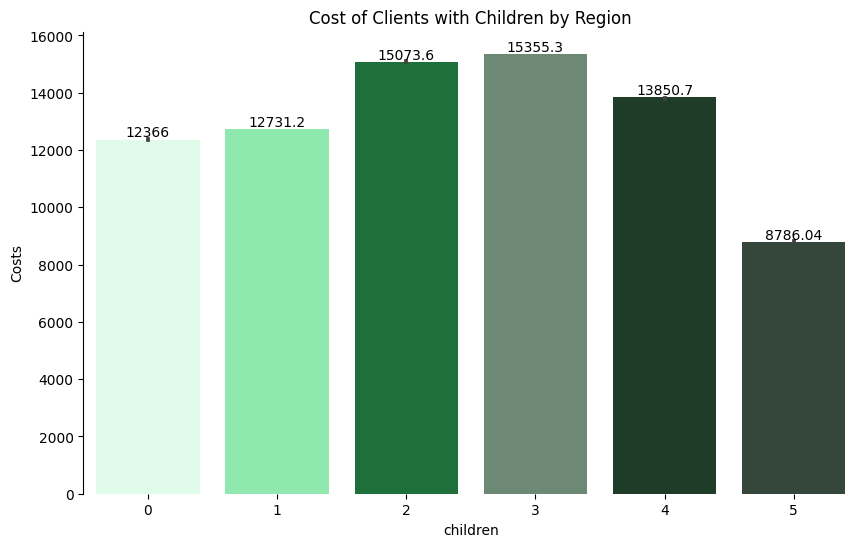

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

# Assuming 'region' is the column with region names and 'count' is the count of people
sns.barplot(x = df['children'], y = df['charges'], ci= 1, palette=color_scheme)
plt.ylabel('Costs')
plt.title('Cost of Clients with Children by Region')

# Labeling the bars with their respective counts
for container in ax.containers:
    ax.bar_label(container)

# Removing unnecessary spines
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False) # Usually, we want to keep the bottom spine visible for the x-axis.
ax.spines['right'].set_visible(False)

plt.show()

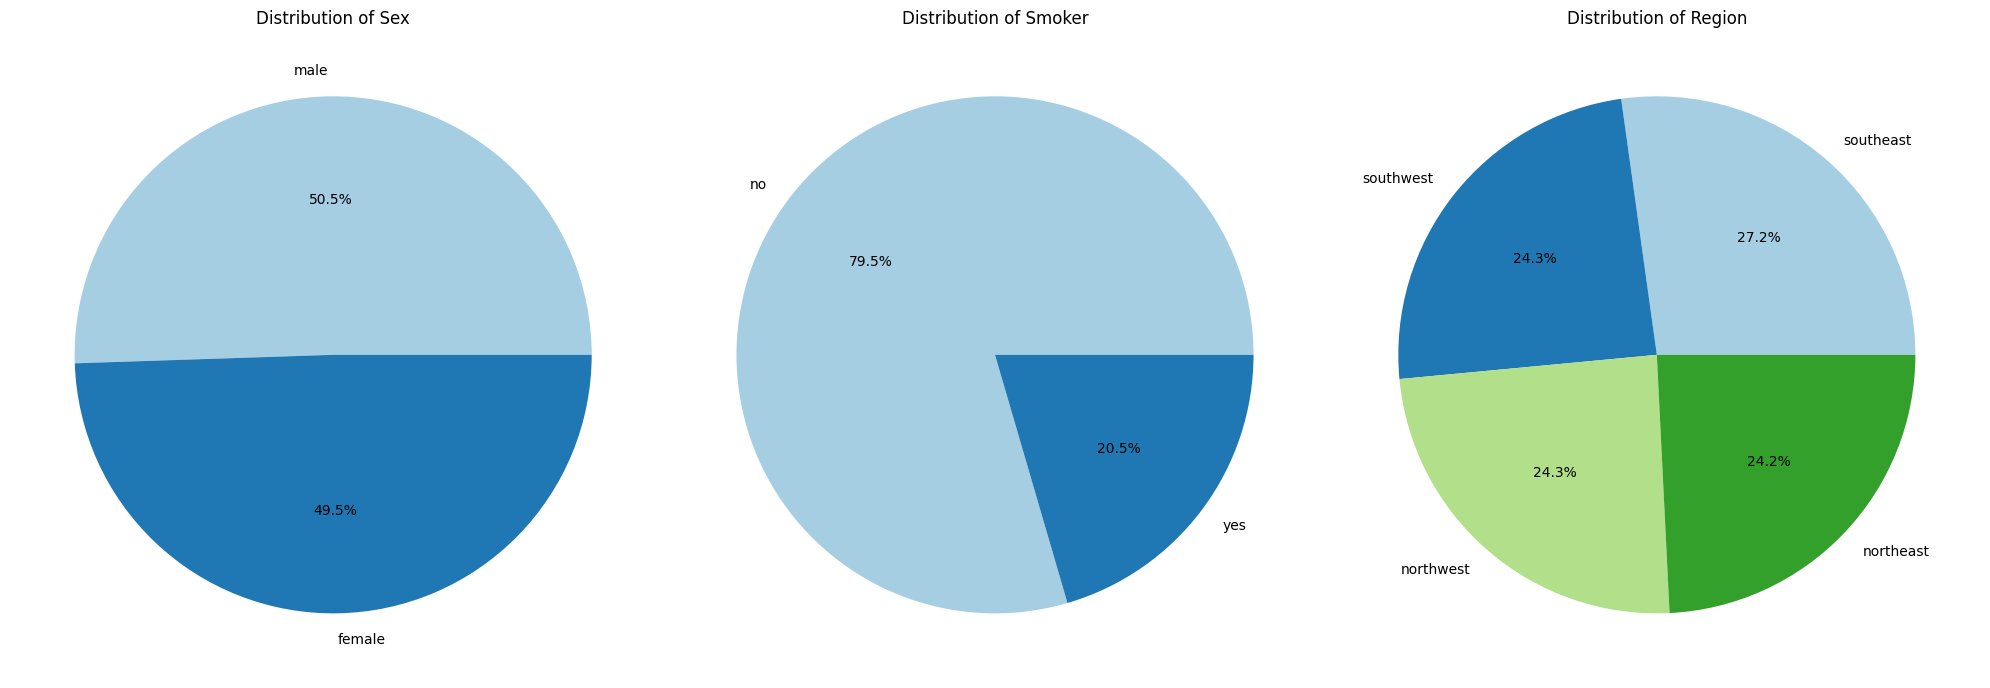

In [14]:
# Features to plot
features = ['sex', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i]
    x = df[col].value_counts()
    ax.pie(x.values, labels=x.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(x))))
    ax.set_title(f'Distribution of {col.capitalize()}')

# Adjust layout
plt.tight_layout()
plt.show()

<div style="background-color:blue; padding:20px; font-size:15px">

👉 The boxplots demonstrate how insurance costs are favorably biased for each location, with a few significant outliers. The Southeast area, which has the largest claim in the data set at nearly \\$63,000 and the lowest claim at \\$1,121, has more inconsistent insurance costs. The Northeast area has the greatest total median cost, although the median claim amounts probably don't differ that much because the boxplots' notches overlap.

In [15]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.express as px

init_notebook_mode(connected=True)
px.defaults.template = "plotly_white"
plot_df=df.copy()
fig = px.box(plot_df, x="region", y="charges", color="region", 
             notched=True, points="outliers", height=600,
             title="Distribution of Insurance Costs by Region",
             color_discrete_sequence=['#B14B51', '#D0A99C', '#5D8370', '#6C839B'])
fig.update_traces(marker=dict(size=9, opacity=0.5, line=dict(width=1,color="#F7F7F7")), showlegend=False)
fig.update_layout(font_color="#303030", xaxis_title='Region', yaxis_title='Claim Amount, $',
                  yaxis=dict(showgrid=True, gridwidth=1, gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'))
fig.show()

In [16]:
fig=px.histogram(df_copy, x='charges', color='smoker', opacity=0.7, barmode='overlay',
                 histnorm='probability density', marginal='box', 
                 title="Distribution of Insurance Costs by Smoking Status",
                 color_discrete_sequence=['#6ead4c','#b1f08e']) 
fig.update_layout(font_color="#303030", xaxis_title='Claim Amount, $',
                  yaxis=dict(title='Probability Density', gridcolor='#EAEAEA', zerolinecolor='#EAEAEA'),
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""))
fig.update_xaxes(showgrid=False, zerolinecolor='#EAEAEA')
fig.show()

<div style="background-color:blue; padding:20px; font-size:15px">
👉 Compared to smokers, whose typical claim amount is over \$ 34,000, non-smokers' median claim amount is around \$7,300. There is also a noticeable difference in the way the groups divide the expenses of insurance. The distribution is tilted to the right for non-smokers, while the claim amounts for smokers are more variable, showing a bimodal distribution with peaks close to \$20,000 and $40,000 and a broader spread in the boxplot.

In [17]:
plot_df = df.copy()
plot_df["Age_Group"]=['18 to 29 years' if i<30 else '30 to 44 years' if (i>=30)&(i<45) else 
                      '45 to 59 years' if (i>=45)&(i<60) else '60 and over' for i in df['age']]
plot_df = plot_df.groupby(['Age_Group','smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index().sort_values('smoker', ascending=True)
fig = px.bar(plot_df, x='Age_Group', y='charges', color='smoker', height=500, text='charges', 
             opacity=0.75, barmode='group', color_discrete_sequence=['#107d34','#80f7a8'],
             title="Average Insurance Costs by Age and Smoking Status")
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside', 
                  marker_line=dict(width=1, color='#303030'))
fig.update_layout(font_color="#303030",bargroupgap=0.05, bargap=0.3, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1, title=""),
                  xaxis=dict(title='Age',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $', showgrid=False,zerolinecolor='#DBDBDB',
                             showline=True, linecolor='#DBDBDB', linewidth=2))
fig.show()

<div style="background-color:blue; padding:20px; font-size:15px">

### What is the relationship between age, smoker and the bmi?
👉 Insurance costs for smokers are, on average, far greater than those for non-smokers in every age category. Age-related increases in claim amounts are also evident, with the 60 and older age group having the most costly claims.
    
---    

In [18]:
fig = px.scatter(df, x='bmi', y='charges', color='smoker', size='charges',
                 title="Insurance costs increase with Body Mass Index among Smokers",
                 color_discrete_sequence=['#107d34','#80f7a8'],height=600)
fig.update_layout(legend=dict(title='',orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  font_color="#303030", xaxis=dict(title='Body Mass Index (BMI)',showgrid=False), 
                  yaxis=dict(title='Claim Amount, $',showgrid=False, zerolinecolor='#E5E5EA',
                             showline=True, linecolor='#E5E5EA', linewidth=2))
fig.show()


<div style="background-color:blue; padding:20px; font-size:15px">
👉 Claim amounts exhibit a positive correlation with body mass index (BMI) as well as age, meaning that higher BMI and older age are associated with higher claim costs. This relationship suggests that individuals with greater body mass and advancing age may experience more health-related issues, leading to increased insurance claims. Additionally, smokers show a heightened sensitivity to this trend, as their insurance costs increase more significantly with BMI compared to non-smokers.

---

<div style="background-color:blue; padding:20px; font-size:15px">

### Do smokers have a higher insurance fee than does who do not?

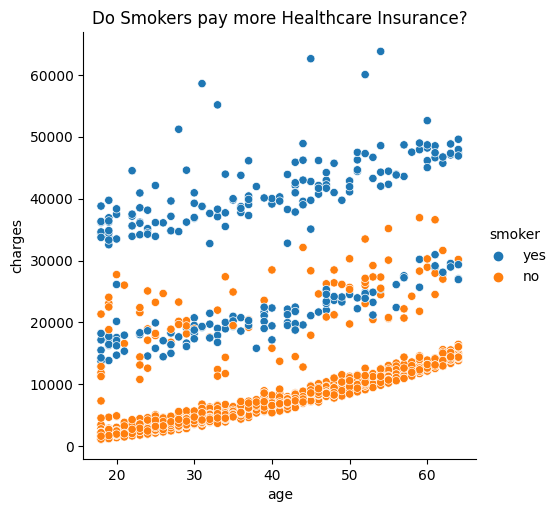

In [19]:
#To do this, let's plot a scatterplot
sns.relplot(x='age', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("age")
plt.ylabel("charges")
plt.title("Do Smokers pay more Healthcare Insurance?")
plt.show()

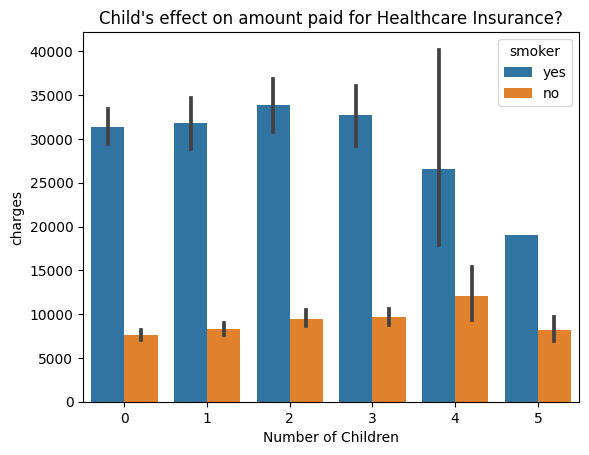

In [20]:
#To do this, let's plot a barplot
sns.barplot(x='children', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Number of Children")
plt.ylabel("charges")
plt.title("Child's effect on amount paid for Healthcare Insurance?")
plt.show()

<div style="background-color:blue; padding:20px; font-size:15px">

### What effect do children have on charges?

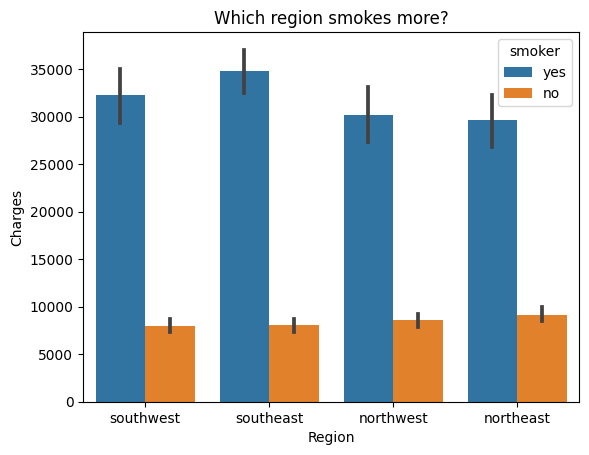

In [21]:
#To do this, let's plot a barplot
sns.barplot(x='region', y='charges', data=df, hue='smoker')  # Color by smoker

# Add labels and title
plt.xlabel("Region")
plt.ylabel("Charges")
plt.title("Which region smokes more?")
plt.show()

In [22]:
# Group by region, sex, and smoker, then calculate mean charges
plot_df = df.groupby(['region', 'sex', 'smoker'])['charges'].mean()
plot_df = plot_df.rename('charges').reset_index()

# Create bar plot
fig = px.bar(
    plot_df,
    x='region',
    y='charges',
    color='sex',
    height=800,
    title="Average Insurance Costs by Region and Smoking Status",
    color_discrete_map={'female': '#107d34', 'male': '#80f7a8'},  # Updated colors
    facet_row='smoker',
    text='charges',
    opacity=0.85,
    barmode='group'
)

# Update traces
fig.update_traces(
    texttemplate='$%{text:,.0f}',
    textposition='outside',
    marker_line=dict(width=1, color='#303030')
)

# Update layout
fig.update_layout(
    yaxis2=dict(matches=None),
    font_color="#303030",
    paper_bgcolor="white",
    plot_bgcolor="white",
    bargroupgap=0.05,
    bargap=0.2,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1,
        title=""
    )
)

# Update axes
fig.update_xaxes(
    title="Region",
    row=1
)
fig.update_yaxes(
    title="Claim Amount, $",
    gridcolor='#E3E3E3',
    zeroline=True,
    zerolinewidth=2,
    showgrid=False,
    zerolinecolor='#E5E5EA',
    showline=True,
    linecolor='#E5E5EA',
    linewidth=2
)

# Format facet annotations
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Show plot
fig.show()

<div style="background-color:blue; padding:20px; font-size:15px">
👉 Non-smokers generally incur smaller insurance claims compared to smokers, with average claim amounts being just under \$10,000 across all regions. This suggests that non-smokers tend to experience fewer or less severe health issues that require insurance claims. In contrast, smokers have significantly higher average claims, which vary widely from approximately \$28,000 to over \$36,000, indicating that smoking is associated with more frequent or severe health problems that lead to higher insurance costs.

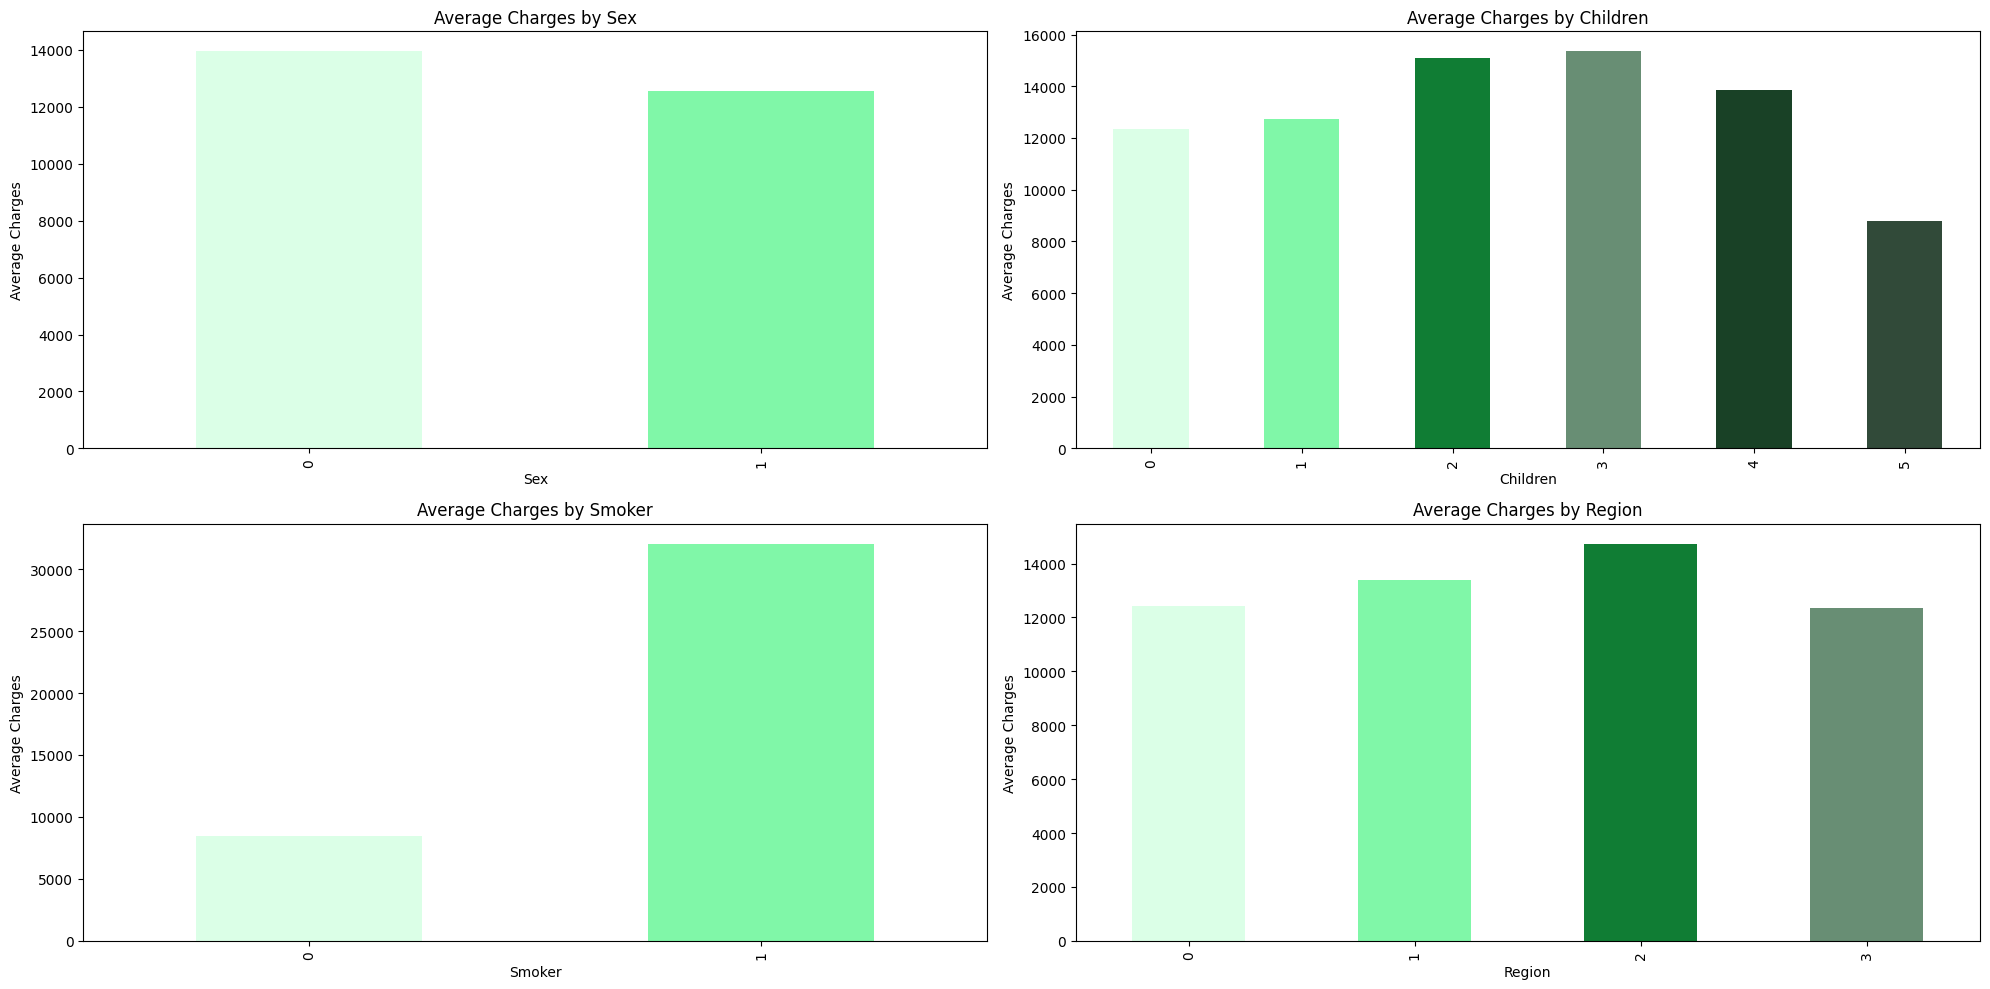

In [23]:
# Define color scheme
color_scheme = ['#dbffe7','#80f7a8','#107d34', '#688e74','#194126','#314a39']

# Features to plot
features = ['sex', 'children', 'smoker', 'region']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Plot each feature
for i, col in enumerate(features):
    ax = axes[i // 2, i % 2]
    
    # Group by the column and calculate the mean charges
    df_grouped = df_copy.groupby(col).mean()['charges']
    
    # Plot the grouped data with the custom color scheme
    df_grouped.plot.bar(ax=ax, color=color_scheme)
    ax.set_title(f'Average Charges by {col.capitalize()}')
    ax.set_ylabel('Average Charges')
    ax.set_xlabel(col.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

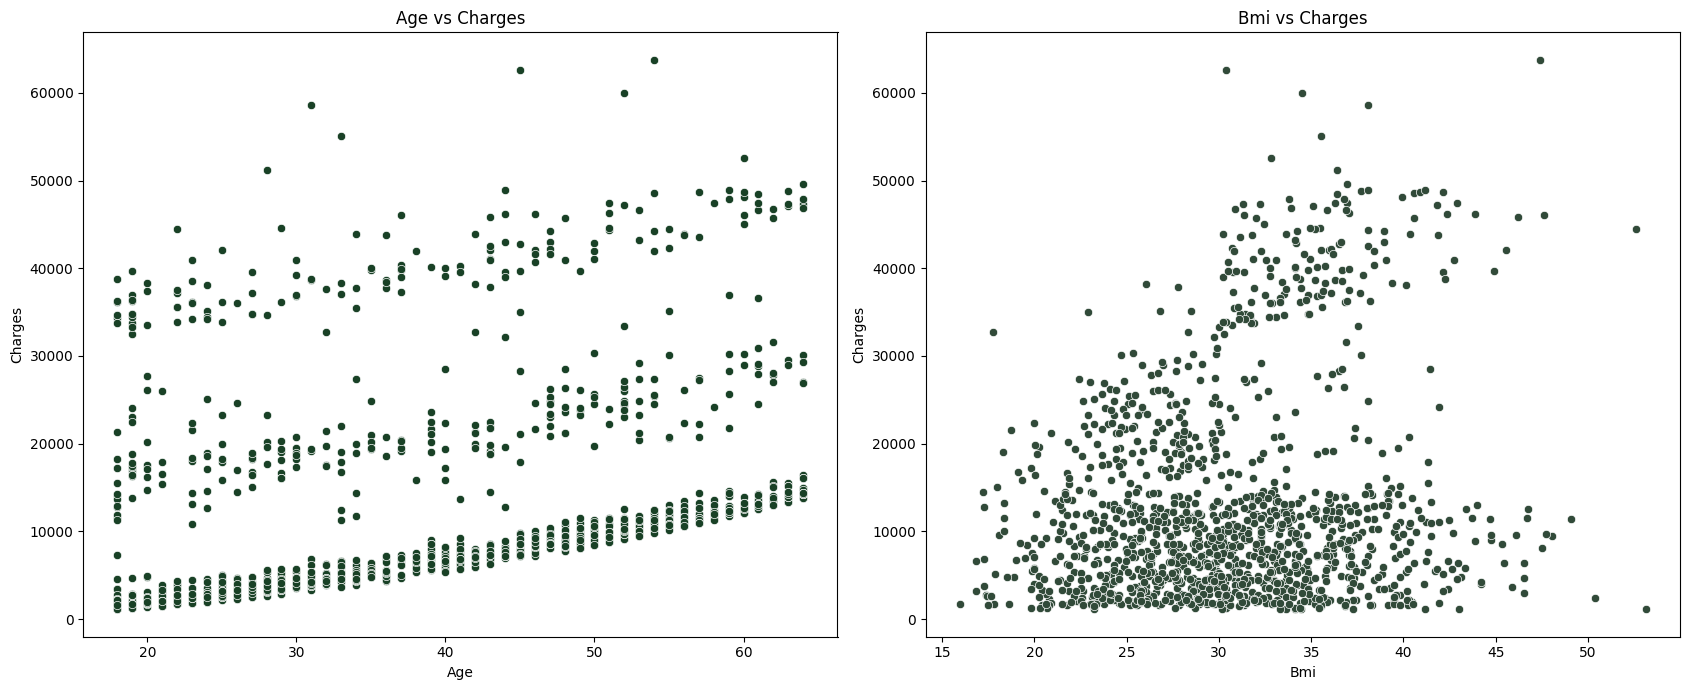

In [24]:
# Features to plot
features = ['age', 'bmi']
color_scheme = ['#194126','#314a39']

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(17, 7))

# Plot each feature with specified colors
for i, col in enumerate(features):
    sns.scatterplot(data=df, x=col, y='charges', color=color_scheme[i], ax=axes[i])
    axes[i].set_title(f'{col.capitalize()} vs Charges')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Charges')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

<div style="text-align: center;">

![Graphical representation of a healthcare concept](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*KptTGAdVgiKvo5VAu3x0gg.jpeg)


<div style="background-color:blue; padding:20px; font-size:15px">

### Machine learning (ML) is revolutionizing the healthcare and insurance industries by enabling more accurate risk assessment, personalized services, and efficient operations. In the health insurance sector, ML models leverage vast amounts of data to predict outcomes, enhance decision-making, and improve customer experiences.
### Machine learning is transforming the health insurance industry by enabling more accurate risk assessment, enhancing fraud detection, improving claims management, and personalizing customer interactions. As the technology continues to evolve, its applications in health insurance are expected to grow, driving further innovation and efficiency in the sector. Addressing challenges related to data privacy, bias, and interpretability will be crucial to realizing the full potential of ML in health insurance

In [25]:
# Split Data
data=df_copy
test = data.sample(frac=0.10)
train = data.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)
     

print(test.shape)
print(train.shape)

(134, 7)
(1204, 7)


In [26]:
# Import pycaret.regression
# Creating pipeline
from pycaret.regression import *
setup_data = setup(
    data=train,
    target='charges',
    normalize = True,
    transformation=True,
    log_experiment = True,
    train_size=0.9,
    session_id=123,
    experiment_name = 'Charges_01'
    )

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1204, 7)"
4,Transformed data shape,"(1204, 7)"
5,Transformed train set shape,"(1083, 7)"
6,Transformed test set shape,"(121, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


2024/08/02 21:54:09 INFO mlflow.tracking.fluent: Experiment with name 'Charges_01' does not exist. Creating a new experiment.


In [27]:
# Split data

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1083, 6)
(1083,)
(121, 6)
(121,)


In [28]:
# Compare different models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2594.8982,21869189.4954,4621.2336,0.8453,0.4193,0.2864,0.0930
catboost,CatBoost Regressor,2774.7462,24062505.4066,4860.5604,0.8294,0.4571,0.3134,1.3890
lightgbm,Light Gradient Boosting Machine,2918.7919,24370041.9299,4888.0440,0.8288,0.5050,0.3516,0.3150
rf,Random Forest Regressor,2812.9364,24507104.8751,4905.5899,0.8277,0.4510,0.3231,0.2250
et,Extra Trees Regressor,2775.9261,26640346.1582,5127.3046,0.8100,0.4650,0.3156,0.1720
ada,AdaBoost Regressor,4202.2220,27800857.1806,5240.5222,0.8032,0.5951,0.6645,0.0500
knn,K Neighbors Regressor,3304.7239,29378066.6000,5385.1694,0.7944,0.4747,0.3519,0.0450
xgboost,Extreme Gradient Boosting,3217.2407,29832827.8000,5429.2794,0.7862,0.5510,0.4055,0.0790
ridge,Ridge Regression,4308.9516,37839540.0000,6117.9502,0.7366,0.5838,0.4365,0.0370
lr,Linear Regression,4307.7659,37840012.6000,6118.0330,0.7366,0.5893,0.4363,0.6990


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

2024/08/02 21:54:55 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 21:54:56 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 21:54:56 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 21:54:56 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 21:54:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/02 21:54:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when

In [29]:
print(best_model)


GradientBoostingRegressor(random_state=123)


<div style="background-color:blue; padding:20px; font-size:15px">
    
 ### The best model for this type of data is GradientBoostingRegressor   

In [30]:
# Verifying the models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [31]:
# Instancing the model
gbr = create_model('gbr')
gbr

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2170.5375,12504077.2564,3536.1105,0.9004,0.4007,0.3144
1,3210.3911,33383103.4153,5777.8113,0.8231,0.4663,0.2784
2,3082.6969,28346022.1210,5324.0982,0.7067,0.4404,0.3104
3,2366.4593,18094287.7176,4253.7381,0.8891,0.3380,0.2660
4,2130.5015,15363003.8306,3919.5668,0.8598,0.3853,0.2273
5,2894.7055,22763325.2434,4771.0927,0.8037,0.4113,0.3382
6,2306.5485,16841720.6171,4103.8665,0.8889,0.4121,0.2519
7,2283.2306,17133174.9125,4139.2240,0.8757,0.3926,0.2815
8,2535.2059,22976318.7230,4793.3619,0.8750,0.4093,0.2734


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

2024/08/02 21:55:06 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


GradientBoostingRegressor(random_state=123)

In [32]:
# Print of the best models
model_parameters = gbr.get_params()
model_parameters

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 123,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [33]:
# Adjusting the model to more robust in the outliers
tuned_gbr = tune_model(gbr, custom_grid={
    'max_depth': [3, 5, 7, 10],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'n_estimators': [100, 200, 500],  
    'subsample': [0.8, 0.9, 1],  
    'min_samples_split': [10, 20, 30],  
    'min_samples_leaf': [4, 10, 20]  
}, optimize='MSE')  # Optimize MSE

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2253.8226,13141354.5493,3625.1006,0.8953,0.3938,0.3320
1,3171.1200,32377386.4489,5690.1130,0.8284,0.4510,0.3005
2,2940.0157,26719406.3915,5169.0818,0.7236,0.4456,0.3240
3,2359.7965,17630891.7554,4198.9155,0.8919,0.3621,0.2991
4,2161.8228,14687405.5888,3832.4151,0.8660,0.3741,0.2470
5,2832.8832,22205960.5986,4712.3201,0.8085,0.4188,0.3526
6,2176.4799,14754745.9840,3841.1907,0.9027,0.3891,0.2703
7,2324.7926,17171104.5878,4143.8032,0.8754,0.3953,0.3032
8,2645.0251,23290783.4771,4826.0526,0.8733,0.4398,0.3308


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


2024/08/02 21:56:51 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.


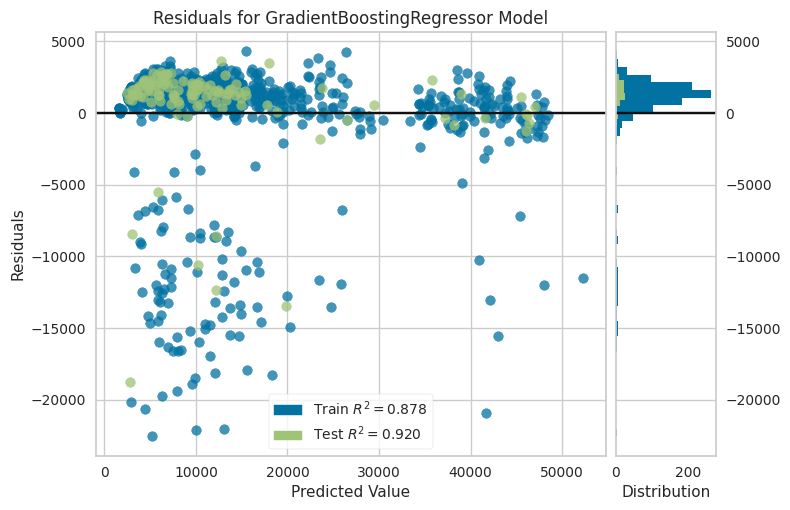

In [34]:
plot_model(tuned_gbr, plot='residuals')


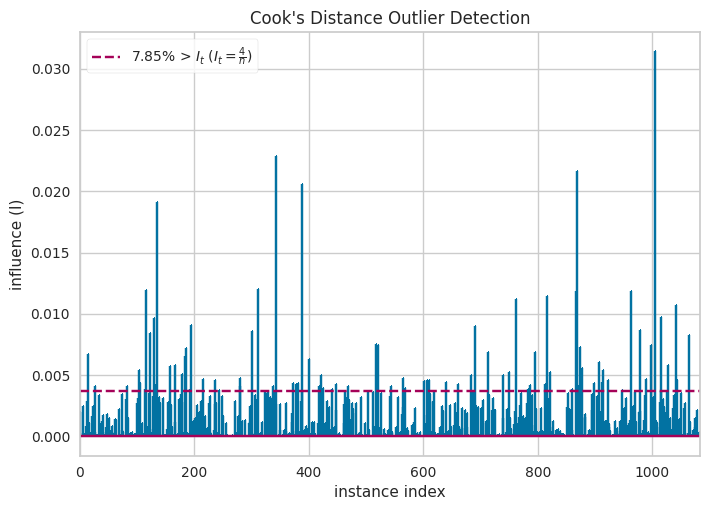

In [35]:
# Plot Cook's Distance Outlier Detection
plot_model(tuned_gbr, plot='cooks')

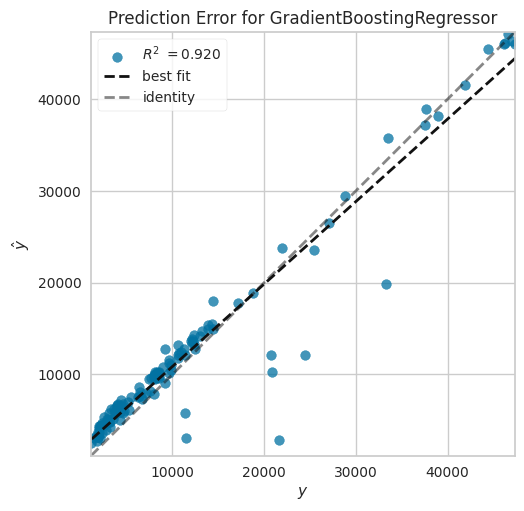

In [36]:
# Plot the model optimized
plot_model(tuned_gbr, plot="error")

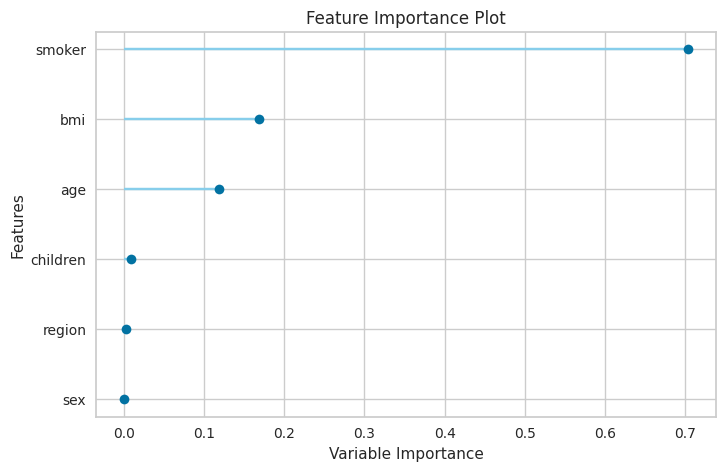

In [37]:
# Feature Importance
plot_model(tuned_gbr, plot="feature")

<div style="background-color:blue; padding:20px; font-size:15px">
    
### The important factor for insurance charges is whether a person smokes or not.

In [38]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Setting SEED for reproducibility
SEED = 23


# Define features and target variable
X = df_copy[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df_copy['charges']

# Define numerical columns
numerical_features = X.columns.tolist()

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())])  # Standardize features

# Define the model and hyperparameter grid
gbr = GradientBoostingRegressor(random_state=SEED)

param_grid = {
    'regressor__max_depth': [3, 5, 7, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__n_estimators': [100, 200, 500],
    'regressor__subsample': [0.8, 0.9, 1],
    'regressor__min_samples_split': [10, 20, 30],
    'regressor__min_samples_leaf': [4, 10, 20]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('regressor', gbr)
])

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Best model from grid search
best_model = grid_search.best_estimator_

# Split the data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=SEED)

# Fit the best model
best_model.fit(train_X, train_y)

# Predict on test set
pred_y = best_model.predict(test_X)

# Calculate RMSE
test_rmse = mean_squared_error(test_y, pred_y, squared=False)

# Calculate R^2 score
test_r2 = r2_score(test_y, pred_y)

# Print RMSE and R^2 score
print('Root Mean Square Error: {:.2f}'.format(test_rmse))
print('R^2 Score: {:.2f}'.format(test_r2))

# Print best hyperparameters
print("Best hyperparameters found: ", grid_search.best_params_)


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Root Mean Square Error: 4486.77
R^2 Score: 0.85
Best hyperparameters found:  {'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__min_samples_leaf': 10, 'regressor__min_samples_split': 30, 'regressor__n_estimators': 500, 'regressor__subsample': 0.8}


<div style="background-color:blue; padding:20px; font-size:15px">
    
### Now, if we input new data for an insurance client, we can determine the percentage likelihood that they will create a payment issue for the insurance company.

In [39]:
 #'sex': {'male': 0, 'female': 1},
#'smoker': {'no': 0, 'yes': 1},
#'region': {'northwest': 0, 'northeast': 1, 'southeast': 2, 'southwest': 3}
new_data = pd.DataFrame({
    'age': [19],
    'sex': [1],
    'bmi': [27.900],
    'children': [0],
    'smoker': [1],
    'region': [3]
})


# Make predictions using the trained best model
predictions = best_model.predict(new_data)

# Print the predictions
print('Predicted charges for the new data: {:.2f}'.format(predictions[0]))


Predicted charges for the new data: 18633.68


### The prediction will be with accuracy 85%